In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Dataset

We can directly load the breast cancer dataset from the scikit learn library. Note that datasets that are included in scikit-learn are usually stored as Bunch objects (a dictionary-like object), with the following attributes: 
* data: The data matrix.
* target: The classification target.
* feature_names: The names of the dataset columns.
* target_names: The names of target classes.
* frame: DataFrame with data and target. Only present when as_frame=True.
* DESCR: The full description of the dataset.

More information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

In [2]:
cancer = load_breast_cancer()
print(cancer.DESCR) # Print the dataset description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Visualise and Explore! ☺

Let's use histograms to get a general impression of how each feature is distributed across the two classes.

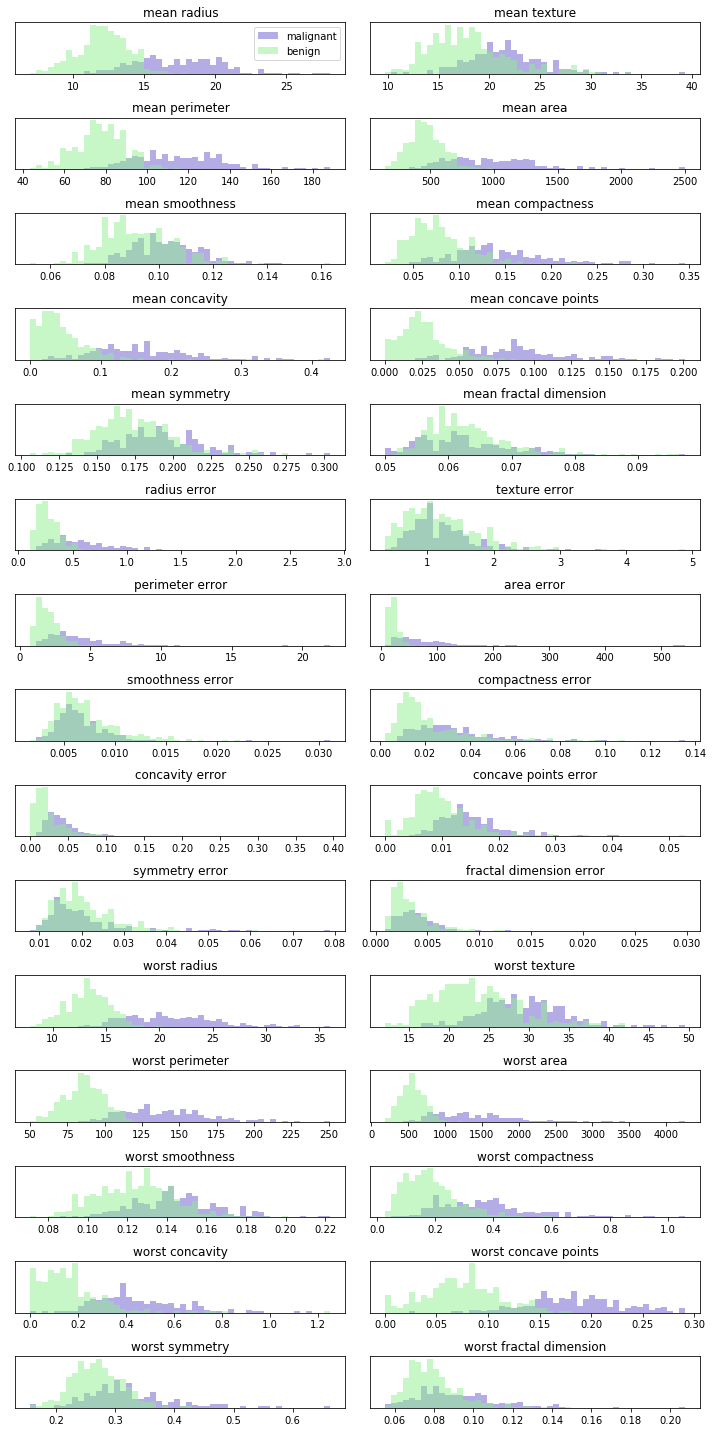

In [3]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20)) 
malignant = cancer.data[cancer.target == 0] 
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color="slateblue", alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color="lightgreen", alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    #ax[i].set_ylabel("Frequency") 
    #ax[i].set_xlabel("Feature magnitude") 
ax[0].legend(["malignant", "benign"], loc="best") 
fig.tight_layout()

* 👾 Take a look at which features have disjoint vs overlapped histograms across the two classes.
* 🤖 Venture a guess as to which features are better at distinguishing malignant and benign samples!
* ⚠️ Anyway, this plot doesn’t tell us the whole story (e.g., it doesn't show us interactions between variables).

# Getting Started with Decision Trees

### ❨Lab 1❩ Decision Tree: Overfitting and Pre-Pruning
* Unpruned trees are prone to overfitting and not generalizing well to new data.
* Limiting the depth of the tree can controll the complexity of trees and decrease overfitting.
* Compare the accuracy on the training set and test set for unpruned and pruned trees

In [4]:
# Prepare the training set and the test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=0)
# Unpruned tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Unpruned tree:")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}\n".format(tree.score(X_test, y_test)))

# Pruned tree
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Pruned tree:")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Unpruned tree:
Accuracy on training set: 1.000
Accuracy on test set: 0.902

Pruned tree:
Accuracy on training set: 0.977
Accuracy on test set: 0.916


🤯 **Quiz**
* Besides limiting the depth of the tree, are there any other pre-pruning strategies? Try to implement and test them in your lab!
    * **HINT**: [max_leaf_nodes, min_samples_leaf](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### ❨Lab 2❩ Analyzing Decision Tree

One advantage of decision tree is that the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees). Let's visually inspect the pruned tree that we obtained from lab 1.
#### Visualise the decision tree

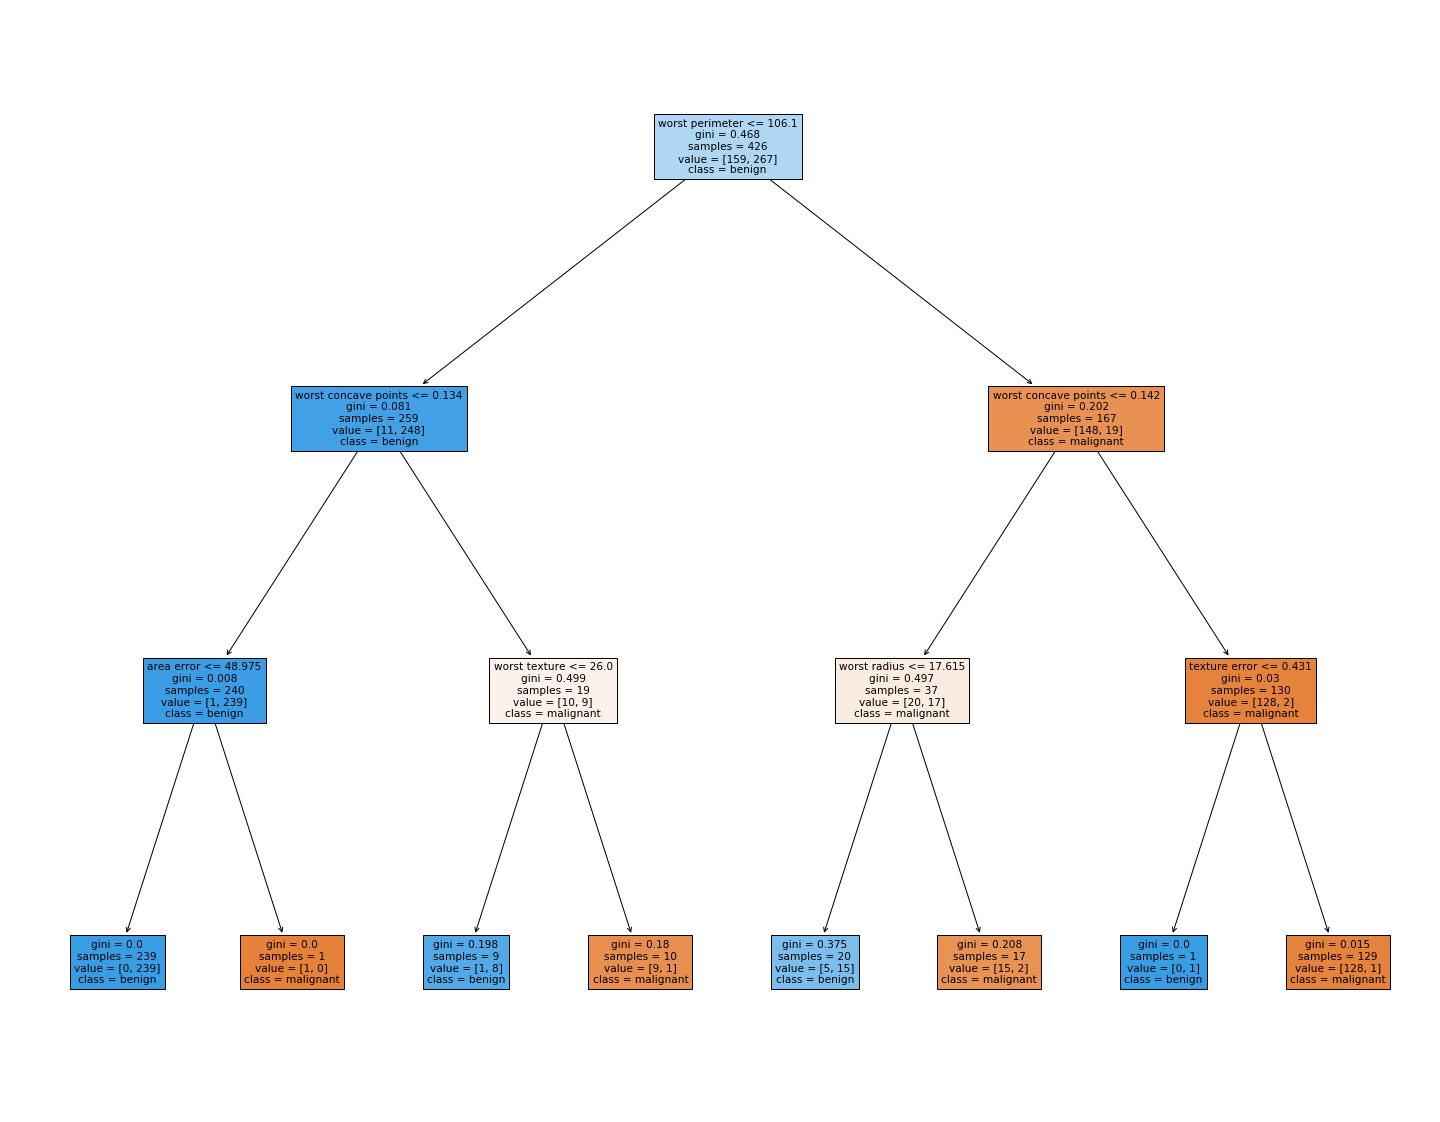

In [5]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree,
              feature_names=cancer.feature_names,
              class_names=cancer.target_names,
              filled=True)

#### Visualise the feature importances
Looking at the whole tree can be taxing. Alternatively, we can plot and interpret feature importance in trees.
* Feature importance ranges between 0 and 1 (always postive).
* The feature importances always sum to 1.
    * 👾 Compare feature importance in trees with coefficients in the linear model.

In [6]:
pd.DataFrame({'feature':cancer.feature_names, 'feature importance':tree.feature_importances_}).round(6).astype(object)

,feature,feature importance
0,mean radius,0
1,mean texture,0
2,mean perimeter,0
3,mean area,0
4,mean smoothness,0
5,mean compactness,0
6,mean concavity,0
7,mean concave points,0
8,mean symmetry,0
9,mean fractal dimension,0


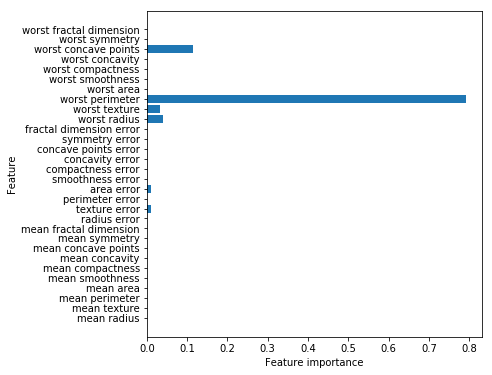

In [7]:
def plot_feature_importances_cancer(model):
    fig = plt.figure(figsize=(6,6))
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

### ❨Lab 3❩ Ensembles of Decision Trees: Random Forests

One downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. Therefore, in many applications, the ensemble methods (e.g., random forests) are often used in place of a single decision tree.

A [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is essentially a collection of decision trees, where each tree is slightly different from the others. The idea is that: if we build many trees, all of which work well and overfit in different ways (achieved by **injecting randomness** into the tree building), we can reduce the amount of overfitting by averaging their results.

🤯 **Quiz:**
* What are the major approaches of injecting randomness into the tree building?
    * **HINT**: data points, bootstrap sample, features
* How does a random forest classifier aggregate predictions generated by different decision trees?
    * **HINT**: soft voting, probability

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=0)
forest.fit(X_train, y_train)
print("Random forest (with 100 trees):")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Random forest (with 100 trees):
Accuracy on training set: 1.000
Accuracy on test set: 0.972


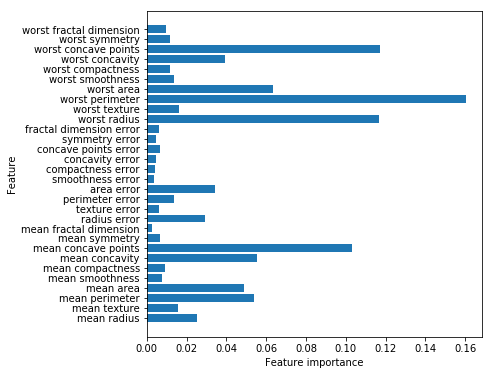

In [9]:
plot_feature_importances_cancer(forest)

# Model Selection and Parameter Tuning

In lab 1 and lab 3, we arbitrarily determined the model hyperparameters. 
In lab 4, we will leverage GridSearchCV and Pipeline for model selection and parameter tuning.

### ❨Lab 4❩ Grid-Searching Which Model To Use
🤯 **Quiz:**

Read the following code, think about
* Why do we define the preprocessing options this way? 
    * **HINT**: Compare SVM and random forests in terms of preprocessing requirements (scaling of data).
* Describe the relationship between hyperparamters (e.g., gamma, C, max_features) and model complexity.
    * **BONUS**: Compare SVM and random forests: which one relies on heavy tuning of the parameter
* Why do we need a pipeline?
    * **HINT**: information leakage (❗️scaling training and testing data the same way❗️ 📝 only fit the scaler on  training data)

In [10]:
# Define the parameter grid to search over
param_grid = [
    {'classifier': [SVC()], 'preprocessing': [StandardScaler(), None],
     'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'preprocessing': [None], 'classifier__max_features': [1, 2, 3, 4, 5, 6]}]

# Define and instantiate a pipeline
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

# Prepare training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# Instantiate and run the grid search
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}

Best cross-validation score: 0.99
Test-set score: 0.98


👾 **Nested cross validation**

In lab 4, we tuned our model with training folds and validation folds, and tested the tuned model on a separate test set. Alternatively, you can use [nested cross validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#:~:text=Nested%20cross%2Dvalidation%20(CV),its%20(hyper)parameter%20search.&text=To%20avoid%20this%20problem%2C%20nested,%2Fvalidation%2Ftest%20set%20splits.) for parameter optimization. **BONUS**: Try to implement the nested CV strategy in your lab!

Data usage when preprocessing inside the cross-validation loop with a pipeline (Andreas C. Müller & Sarah Guido, 2016)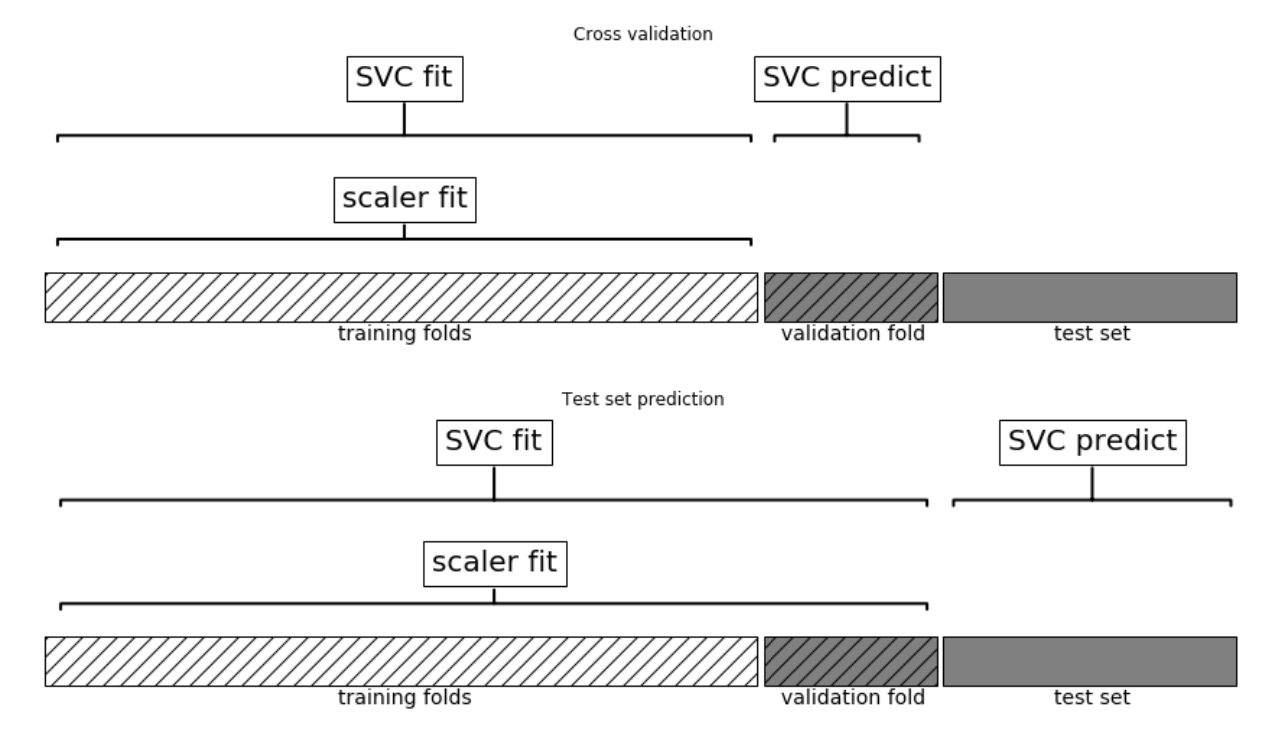

## Reference


Müller, A. C., & Guido, S. (2016). Introduction to Machine Learning with Python: A Guide for Data Scientists. O'Reilly Media, Inc.